In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:04<00:00, 267MB/s]
100% 1.06G/1.06G [00:04<00:00, 236MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout #BN and DO are used to increase accuracy

In [ ]:
# generators divides the data into batches to increase the speed and use RAM effectively
# gererators are very useful to process large amount of data
# detailed documentation of generators https://keras.io/api/data_loading/image/
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',#path of Train folder
    labels='inferred',
    label_mode = 'int',#assign 0 for cat and 1 for dog
    batch_size=32,
    image_size=(256,256)#reshape images to 256*256*3
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',#path of Test folder
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize to values from 0-255 to 0-1
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model
# CNN Architecture - 3 Convolutional Layers - in first layer 32 filters - in second layer 64 filters - and in third layer 128 filters
# Pooling layer for Dimensionality Reduction & Translation Invariance

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 108ms/step - loss: 1.1135 - accuracy: 0.6181 - val_loss: 0.5950 - val_accuracy: 0.6352
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5474 - accuracy: 0.7176 - val_loss: 0.5384 - val_accuracy: 0.7320
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4676 - accuracy: 0.7731 - val_loss: 0.5683 - val_accuracy: 0.7268
Epoch 4/10
625/625 [==============================] - 68s 107ms/step - loss: 0.4249 - accuracy: 0.8027 - val_loss: 0.5136 - val_accuracy: 0.7690
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3671 - accuracy: 0.8284 - val_loss: 0.5467 - val_accuracy: 0.7404
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3116 - accuracy: 0.8577 - val_loss: 0.6647 - val_accuracy: 0.6378
Epoch 7/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2589 - accuracy: 0.8860 - val_loss: 0.4203 - val_ac

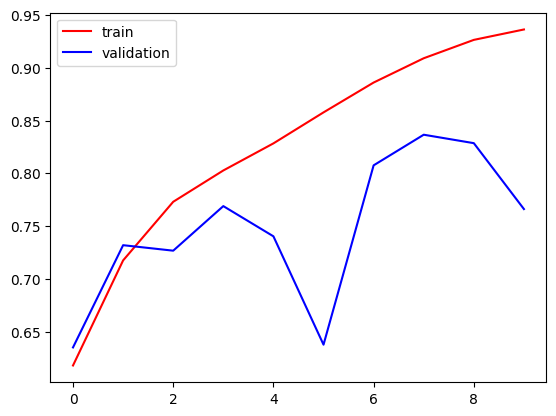

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
#try to decrease the gap to reduce overfitting

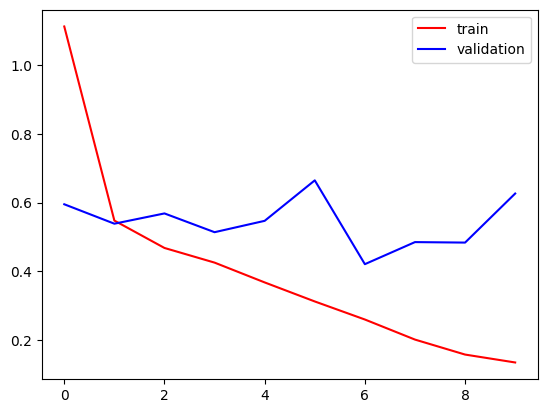

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
#try to decrease the gap to reduce overfitting

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
test_img1 = cv2.imread('/content/Dog (1).jpg')

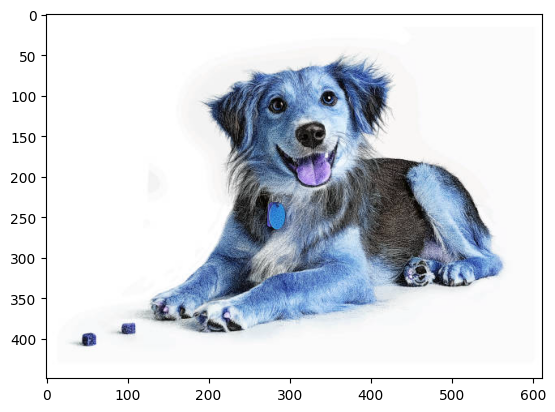

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img1.shape #actual shape of the image

(449, 612, 3)

In [ ]:
test_img1 = cv2.resize(test_img1,(256,256))

In [ ]:
test_input1 = test_img1.reshape((1,256,256,3)) #in this batch there is only one image

In [ ]:
model.predict(test_input1) # classn 0 for Cat and 1 for Dog

1/1 [==============================] - 0s 479ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img2 = cv2.imread('/content/Cat.jpg')

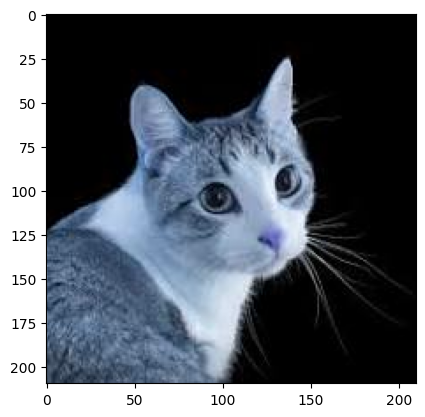

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2.shape

(210, 210, 3)

In [ ]:
test_img2 = cv2.resize(test_img2,(256,256))

In [ ]:
test_input2 = test_img2.reshape((1,256,256,3))

In [ ]:
model.predict(test_input2)

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img3 = cv2.imread('/content/cat2.jpeg')

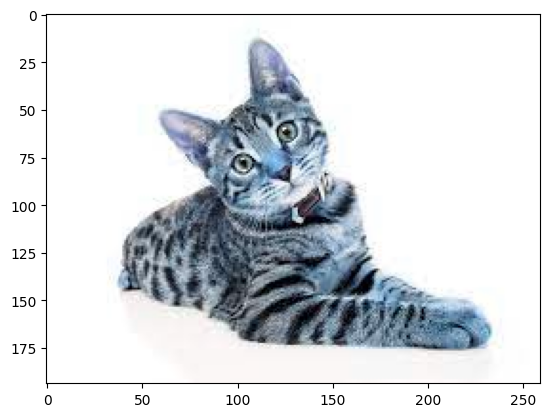

In [ ]:
plt.imshow(test_img3)

In [ ]:
test_img3.shape

(194, 259, 3)

In [ ]:
test_img3 = cv2.resize(test_img2,(256,256))

In [ ]:
test_input3 = test_img3.reshape((1,256,256,3))

In [ ]:
model.predict(test_input3)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)